# Group 16: SIT307 Data Mining Group Project

Dataset Selected/used: <b>COVID-19 World Vaccination Progress</b>

Found at: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

Collected by: <b>Gabriel Preda</b>

Updated: <b>Daily</b>

Date of download: <b>xx April 2021</b>

Imported libraries used

In [1]:
# import libraries used
import numpy as np
import pandas as pd
pd.set_option('precision', 2)
from pandas_profiling import ProfileReport
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## Data Cleansing
Get some information about the data set such as what are the columns, the data type in those columns and the number of columns and rows

In [2]:
# read in CSV file to vaccination and preview head
vaccination = pd.read_csv('data/country_vaccinations.csv')
vaccination.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,22/02/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,23/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,24/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,25/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,26/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [3]:
# See what the column headings are
vaccination.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [4]:
# and the data type stored in those columns
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8451 non-null   object 
 1   iso_code                             8451 non-null   object 
 2   date                                 8451 non-null   object 
 3   total_vaccinations                   5231 non-null   float64
 4   people_vaccinated                    4688 non-null   float64
 5   people_fully_vaccinated              3186 non-null   float64
 6   daily_vaccinations_raw               4415 non-null   float64
 7   daily_vaccinations                   8260 non-null   float64
 8   total_vaccinations_per_hundred       5231 non-null   float64
 9   people_vaccinated_per_hundred        4688 non-null   float64
 10  people_fully_vaccinated_per_hundred  3186 non-null   float64
 11  daily_vaccinations_per_million

In [5]:
# and the shape of the data set
vaccination.shape

(8451, 15)

Check categorical columns for spelling errors and misprints/typos:

In [6]:
# check the unique values of country
vaccination.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands',
       'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Faeroe Islands',
       'Falkland Islands', 'Finland', 'France', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Laos

In [7]:
# check the unique values of ISO code
vaccination.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BMU', 'BOL', 'BRA', 'BGR', 'KHM', 'CAN', 'CYM', 'CHL', 'CHN',
       'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE', 'DNK', 'DMA', 'DOM',
       'ECU', 'EGY', 'SLV', 'OWID_ENG', 'GNQ', 'EST', 'FRO', 'FLK', 'FIN',
       'FRA', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY',
       'GIN', 'GUY', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN',
       'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ',
       'KEN', 'KWT', 'LAO', 'LVA', 'LBN', 'LIE', 'LTU', 'LUX', 'MAC',
       'MWI', 'MYS', 'MDV', 'MLT', 'MUS', 'MEX', 'MDA', 'MCO', 'MNG',
       'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL',
       'NGA', 'MKD', 'OWID_CYN', 'OWID_NIR', 'NOR', 'OMN', 'PAK', 'PAN',
       'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'RWA',
       'SHN', 'KNA', 'LCA', 'VCT', 'SMR', 'SAU', 'OWID_SCT', 'SEN', 'SRB',
       

In [8]:
# check the unique values of vaccine used in the country
vaccination.vaccines.unique()

array(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Moderna, Pfizer/BioNTech', 'Moderna',
       'Moderna, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'EpiVacCorona, Sputnik V', 'Johnson&Johnson',
       'Pfizer/BioNTech, Sputnik V',
   

Source name and source website will not be used in data analysis, therefore there is no need to check for misprints

No errors or misprints/typos found therefore no cleaning is required here.

Check numerical columns for unreasonable minimum values:

In [9]:
# set pandas to float format to show full numbers
pd.set_option('float_format', '{:f}'.format)

# descriptive statistical values showing mean and five number summary
vaccination.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,5231.000000,4688.000000,3186.000000,4415.000000,8260.000000,5231.000000,4688.000000,3186.000000,8260.000000
mean,2792692.129421,2156748.130546,950346.089768,99310.352208,63461.179540,10.456412,7.859851,3.829357,2722.191889
std,10191138.729438,7169883.975902,3817420.599500,335984.658804,230293.608592,18.453447,12.320235,8.163778,4129.512041
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,42388.500000,39101.500000,20137.000000,2825.500000,1073.000000,0.820000,0.830000,0.440000,368.750000
50%,289210.000000,258811.000000,121351.500000,14152.000000,6158.500000,3.950000,3.295000,1.550000,1356.000000
75%,1367629.000000,1034796.000000,503932.750000,57538.500000,27990.000000,11.710000,8.920000,3.430000,3347.750000
max,140180735.000000,91707729.000000,50141769.000000,6124000.000000,3923000.000000,171.100000,91.850000,79.260000,54264.000000


No negative values found and no unreasonable values such as over 100 people per 100 people fully vaccinated.

<b>Note:</b> one country has 171 total vaccinations per hundred. While this seems incorrect, this column registers single doses and as people require 2 doses this 171 is correct. Over 200 would be an impossible value.

Test the number of null values per column to see which ones have high missing value ratios. However, don't remove the row as the row could contain valuable information to a different column. Missing value removal will be done when the column wants to be used.

In [10]:
# get the count of null values in each column
vaccination.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     3220
people_vaccinated                      3763
people_fully_vaccinated                5265
daily_vaccinations_raw                 4036
daily_vaccinations                      191
total_vaccinations_per_hundred         3220
people_vaccinated_per_hundred          3763
people_fully_vaccinated_per_hundred    5265
daily_vaccinations_per_million          191
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Transform date data type to date time instead of object. 

In [11]:
# convert data format to day, month, year
vaccination['date'] = pd.to_datetime(vaccination['date'], format="%d/%m/%Y", errors='raise')

# check data type of date is now date time
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8451 non-null   object        
 1   iso_code                             8451 non-null   object        
 2   date                                 8451 non-null   datetime64[ns]
 3   total_vaccinations                   5231 non-null   float64       
 4   people_vaccinated                    4688 non-null   float64       
 5   people_fully_vaccinated              3186 non-null   float64       
 6   daily_vaccinations_raw               4415 non-null   float64       
 7   daily_vaccinations                   8260 non-null   float64       
 8   total_vaccinations_per_hundred       5231 non-null   float64       
 9   people_vaccinated_per_hundred        4688 non-null   float64       
 10  people_fully

#### Z-Scores
Check the numerical column Z-scores to determine outliers

In [12]:
# take just numerical columns and determine Z-score in new data frame called z-scores
z_score_cols = vaccination[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw',
                          'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                          'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']].copy()

z_scores = pd.DataFrame(stats.zscore(z_score_cols, nan_policy='omit'))

In [13]:
# display Z-Score descriptive statistics to determine average, max, min, lower and upper quartile of Z-scores
z_scores.describe()

,0,1,2,3,4,5,6,7,8
count,5231.000000,4688.000000,3186.000000,4415.000000,8260.000000,5231.000000,4688.000000,3186.000000,8260.000000
mean,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000
std,1.000096,1.000107,1.000157,1.000113,1.000061,1.000096,1.000107,1.000157,1.000061
min,-0.274058,-0.300839,-0.248989,-0.295614,-0.275579,-0.566691,-0.638031,-0.469140,-0.659244
25%,-0.269898,-0.295384,-0.243713,-0.287203,-0.270924,-0.522251,-0.570655,-0.415235,-0.569942
50%,-0.245676,-0.264738,-0.217195,-0.253488,-0.248840,-0.352619,-0.370556,-0.279247,-0.330856
75%,-0.139847,-0.156498,-0.116959,-0.124341,-0.154035,0.067939,0.086059,-0.048926,0.151494
max,13.482416,12.491211,12.888060,17.933474,16.760224,8.706175,6.817979,9.241124,12.482087


In [14]:
z_scores[z_scores > np.abs(3.0)].count()

0     74
1     92
2     42
3     81
4    144
5    123
6    103
7     87
8    144
dtype: int64

As there are a large number of high z scores (greater than 3) due to different countries vaccination capabilities at different stages of their role outs, no outliers will be removed as this is valuable data and would lose a large number of data records.

#### Duplicate Rows
Duplicate rows were determined in order to remove these so as not to provide misleading analysis

In [15]:
# test for duplicate rows
vaccination.duplicated().sum()

0

No duplicate rows found

#### Feature Selection
Filter stratergy was used to remove columns with low information gain and duplication that would not be neccisary for any of our analysis

In [16]:
# drop source name, source website, raw daily vaccinations and ISO codes from dataframe to leave a clean and smaller dataset
vaccination = vaccination.drop(columns=['source_name', 'source_website', 'iso_code', 'daily_vaccinations_raw'])

## Exploratory Data Analysis
Exploring the data in different ways. First some correlations were identified then many experiments were performed but only select few have been included so as not to clog code file. The following questions were explored here: 

1. Which country has vaccinated the most people and what vaccine have they used?
2. Which country has fully vaccinated the most people?
3. The most vaccines administered in a single day, and by which country?
4. Which country has adminisered at least one dose to the largest percentage of their population?
5. What vaccines are used in which countries?
6. Which vaccines is the most used around the globe?

Some further exploring was done to find interesting patterns by looking at various top and bottom 10 countries in different categories such as total vaccinations and largest percentage of population vaccinated.

Finally, a line graph was plotted to show the variance in vaccination rates of some different countries.

#### Pearson Correlation
Pearson Correlation was used to determine correlation between different columns

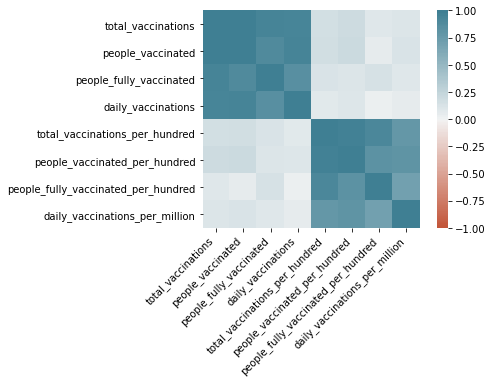

In [17]:
# determine pearson correlation and display as heat map
corr = vaccination.corr(method='pearson')

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# source from https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

Descriptive statistics were able to be used to determine some interesting information such as country who has administered the most vaccines, the highest number of fully vaccinated people, the most vaccines administered on a single day, the country that has administered at least one dose to the largest percentage of their population and the most used vaccine around the world.

#### Most Vaccines Administers

In [18]:
# determine the index that contains the highest total vaccination value and display
most_vacs = vaccination['total_vaccinations'].idxmax()
most_vacs

8243

In [19]:
# show the country, date and number of people vaccinated based on the highest total vaccination
country_most, date_recorded, total_vaccinations_most = vaccination.iloc[most_vacs][['country', 'date', 'total_vaccinations']]

In [21]:
vaccines_used = vaccination.loc[vaccination['country'] == country_most, 'vaccines']

In [25]:
print(country_most, 'has administer the most vaccinations as of', date_recorded.strftime("%d %b %Y"), 'with a total of', 
      int(total_vaccinations_most), 'using', vaccines_used.unique(), 'vaccines.')

United States has administer the most vaccinations as of 27 Mar 2021 with a total of 140180735 using ['Johnson&Johnson, Moderna, Pfizer/BioNTech'] vaccines.


#### Fully Vaccinated the Most People

In [26]:
# determine the index that contains the highest total vaccination value and display
most_full_vacs = vaccination['people_fully_vaccinated'].idxmax()
most_full_vacs

8243

In [29]:
# show the country, date and number of people vaccinated based on the highest total vaccination
country_fully, date_fully, people_full_vacc = vaccination.iloc[most_full_vacs][['country', 'date', 'people_fully_vaccinated']]
print(country_fully, 'has the most fully vaccinated people as of', date_fully.strftime("%d %b %Y"), 'with a total of', 
      int(people_full_vacc))

United States has the most fully vaccinated people as of 27 Mar 2021 with a total of 50141769


#### Most Vaccines Administered in SIngle Day

#### Country That Has Administered at least One Dose to the Largest Percentage of Their Population

#### Most used vaccine

In [30]:
# Most used vaccine
# taking just the country and vaccine
most_used_vac = vaccination[['country','vaccines']]

# check worked correctly
most_used_vac.columns

Index(['country', 'vaccines'], dtype='object')

In [31]:
# concat multiple vaccines contained by spliting at commas
most_used_vac = pd.concat([most_used_vac['country'], most_used_vac['vaccines'].str.split(', ', expand=True)], axis=1)
most_used_vac

,country,0,1,2,3,4
0,Afghanistan,Oxford/AstraZeneca,None,None,None,None
1,Afghanistan,Oxford/AstraZeneca,None,None,None,None
2,Afghanistan,Oxford/AstraZeneca,None,None,None,None
3,Afghanistan,Oxford/AstraZeneca,None,None,None,None
4,Afghanistan,Oxford/AstraZeneca,None,None,None,None
...,...,...,...,...,...,...
8446,Zimbabwe,Sinopharm/Beijing,None,None,None,None
8447,Zimbabwe,Sinopharm/Beijing,None,None,None,None
8448,Zimbabwe,Sinopharm/Beijing,None,None,None,None
8449,Zimbabwe,Sinopharm/Beijing,None,None,None,None


In [32]:
# melt the different columns into a single one with country
most_used_vac = most_used_vac.melt(id_vars=['country'])
most_used_vac

,country,variable,value
0,Afghanistan,0,Oxford/AstraZeneca
1,Afghanistan,0,Oxford/AstraZeneca
2,Afghanistan,0,Oxford/AstraZeneca
3,Afghanistan,0,Oxford/AstraZeneca
4,Afghanistan,0,Oxford/AstraZeneca
...,...,...,...
42250,Zimbabwe,4,None
42251,Zimbabwe,4,None
42252,Zimbabwe,4,None
42253,Zimbabwe,4,None


In [33]:
# remove variable column
most_used_vac.drop('variable', axis=1, inplace=True)

# check number of null values in dataframe
most_used_vac.isnull().sum()

country        0
value      25072
dtype: int64

In [34]:
# show columns and head
most_used_vac.columns = ['country','vaccines']
most_used_vac.head()

,country,vaccines
0,Afghanistan,Oxford/AstraZeneca
1,Afghanistan,Oxford/AstraZeneca
2,Afghanistan,Oxford/AstraZeneca
3,Afghanistan,Oxford/AstraZeneca
4,Afghanistan,Oxford/AstraZeneca


In [35]:
# display the number of unique vaccine entries and what they are
print(len(most_used_vac.vaccines.unique()))
most_used_vac.vaccines.unique()

11


array(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V', 'Moderna',
       'Sinovac', 'Sinopharm/Beijing', 'Covaxin', 'EpiVacCorona',
       'Johnson&Johnson', None, 'Sinopharm/Wuhan'], dtype=object)

In [36]:
# get information from data frame
most_used_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42255 entries, 0 to 42254
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   42255 non-null  object
 1   vaccines  17183 non-null  object
dtypes: object(2)
memory usage: 660.4+ KB


In [37]:
# drop all rows containing null values as any country that only uses one
# vaccine will have many NA values
most_used_vac = most_used_vac.dropna(axis=0)

# check all null values been removed
most_used_vac.isnull().sum()

country     0
vaccines    0
dtype: int64

In [38]:
# check unique vaccines after none has been removed
print(len(most_used_vac.vaccines.unique()))

10


In [39]:
# create a summary grouping countries by unique vaccines
summary = most_used_vac.groupby('vaccines')['country'].agg(['unique'])
# display summary
summary

,unique
vaccines,
Covaxin,[India]
EpiVacCorona,[Russia]
Johnson&Johnson,"[South Africa, United States]"
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ..."
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba..."
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch..."
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La..."
Sinopharm/Wuhan,"[China, United Arab Emirates]"
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi..."


In [40]:
# add a number of countries column to data frame
summary['nCountry'] = summary.unique.str.len()
# display summary
summary

,unique,nCountry
vaccines,,
Covaxin,[India],1
EpiVacCorona,[Russia],1
Johnson&Johnson,"[South Africa, United States]",2
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ...",34
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",92
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",80
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La...",21
Sinopharm/Wuhan,"[China, United Arab Emirates]",2
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi...",14


In [41]:
# display number of countries identified
summary.nCountry.sum()

267

In [42]:
# work out the percentage of countries that use each vaccine and add new column
summary = summary.assign(pCountry = lambda x: ((x['nCountry'])/summary.nCountry.sum()) * 100)
# display
summary

,unique,nCountry,pCountry
vaccines,,,
Covaxin,[India],1,0.374532
EpiVacCorona,[Russia],1,0.374532
Johnson&Johnson,"[South Africa, United States]",2,0.749064
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ...",34,12.734082
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",92,34.456929
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",80,29.962547
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La...",21,7.865169
Sinopharm/Wuhan,"[China, United Arab Emirates]",2,0.749064
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi...",14,5.243446


In [43]:
# sort summary with most used vaccine first
summary.sort_values('nCountry', ascending=False)

,unique,nCountry,pCountry
vaccines,,,
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",92,34.456929
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",80,29.962547
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ...",34,12.734082
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La...",21,7.865169
Sputnik V,"[Algeria, Belarus, Bolivia, Guinea, Iran, Kaza...",20,7.490637
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi...",14,5.243446
Johnson&Johnson,"[South Africa, United States]",2,0.749064
Sinopharm/Wuhan,"[China, United Arab Emirates]",2,0.749064
Covaxin,[India],1,0.374532


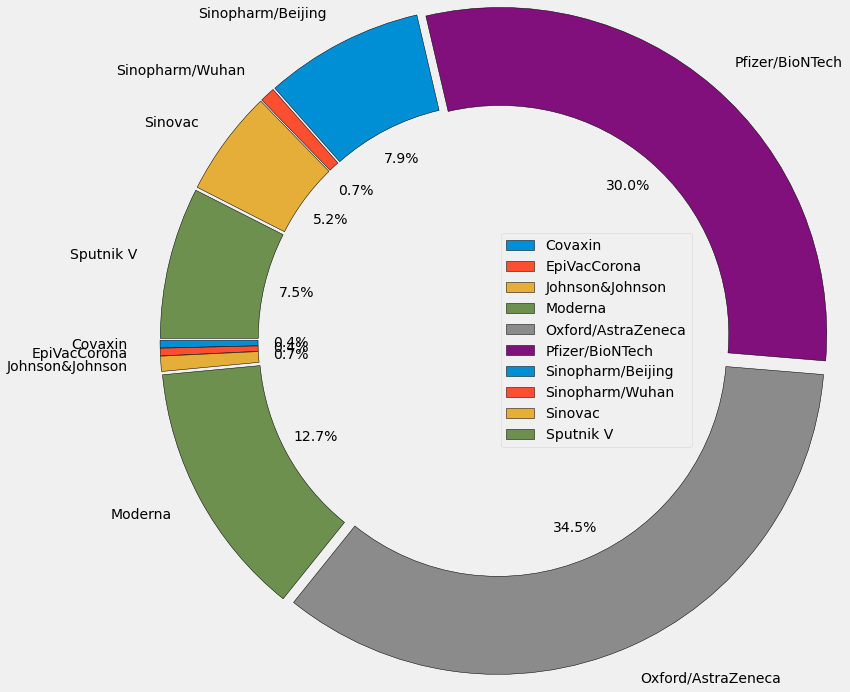

In [44]:
# create a pie chart to show the use of each vaccine
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
labels = summary.index

plt.pie(summary.pCountry, labels=labels, explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], 
        wedgeprops={'edgecolor':'black', 'width':0.6}, startangle=180, autopct='%1.1F%%', radius=2)

plt.legend(loc='right')
plt.show()

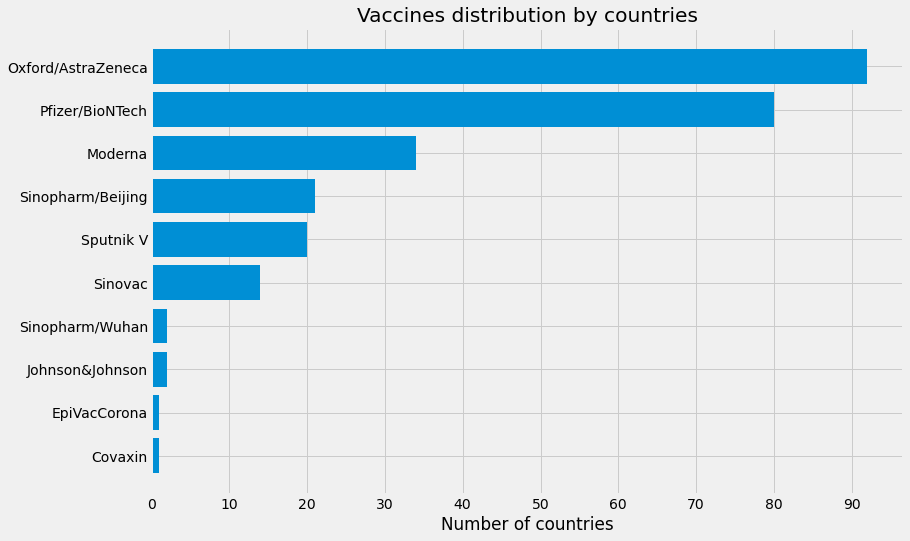

In [45]:
# create a horisontal bar graph to show the number of countries using a given vaccine
summary = summary.sort_values('nCountry')

plt.figure(figsize=(12,8))
plt.title("Vaccines distribution by countries")
plt.style.use('fivethirtyeight')
plt.xlabel('Number of countries')
plt.xticks(np.arange(0,110,10))

plt.barh(summary.index, summary.nCountry)
plt.show()

#### Top 10 Total Vaccinations

#### Bottom 10 Total Vaccinations

#### Top 10 Percentage of Population Vaccinated

#### Bottom 10 Percentage of Population Vaccinated

#### Vaccination Rates of Various Countries

In [80]:
# select certain countries to plot in new data frame
vac_rates = vaccination[vaccination['country'].isin(['United States', 'United Kingdom', 'Australia', 'France', 'India', 'China'])]
vac_rates = vac_rates[['country', 'date', 'daily_vaccinations']]
print(vac_rates)



            country       date  daily_vaccinations
361       Australia 2021-02-15                 nan
362       Australia 2021-02-16                 nan
363       Australia 2021-02-17                 nan
364       Australia 2021-02-18                 nan
365       Australia 2021-02-19                 nan
...             ...        ...                 ...
8239  United States 2021-03-23      2497025.000000
8240  United States 2021-03-24      2490889.000000
8241  United States 2021-03-25      2510755.000000
8242  United States 2021-03-26      2624410.000000
8243  United States 2021-03-27      2677034.000000

[405 rows x 3 columns]


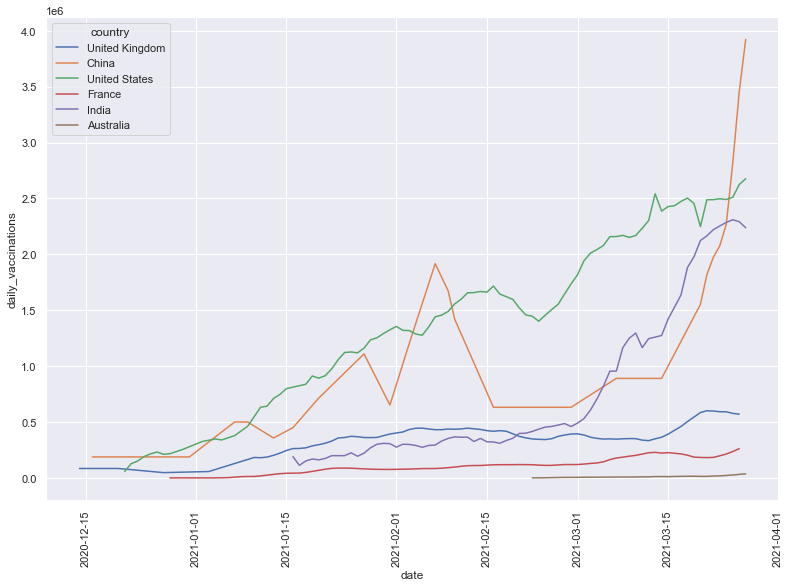

In [106]:
# create plot
sns.axes_style("whitegrid")
sns.set(rc={'figure.figsize':(12,9)})



graph = sns.lineplot(data=vaccination[vaccination['country'].isin(['United States','United Kingdom','Australia','India','China','France'])]
                     .sort_values(by="date"), x="date", y="daily_vaccinations", hue='country')


plt.xticks(rotation = 90)


plt.show()

## Confirmatory Analysis
